In [68]:
from random import random
from funcoes import sigmoid, sigmoid_derivative, relu, relu_derivative
from matplotlib import pyplot as plt

import numpy as np
import ipdb

ImportError: cannot import name 'relu'

In [2]:
"""
CONFIGURAÇÕES: 

quantidade de camadas,
quantidade de neurônios em cada camada,
função de ativação
"""

dimensoes_camadas = [2,2,1]


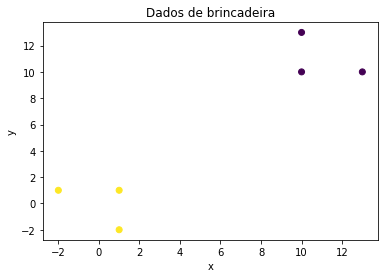

In [3]:
dados = [
    [10,10],
    [10,13],
    [13,10],
    
    [1,1],
    [-2,1],
    [1,-2],
    
#     [1,10],
#     [1,13],
#     [-2,10]
]

labels = [
    0,
    0,
    0,
    
    1,
    1,
    1,
    
#     2,
#     2,
#     2
]


x = [d[0] for d in dados]
y = [d[1] for d in dados]
plt.scatter(x,y, c=labels)
plt.title("Dados de brincadeira")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [94]:
def one_hot(y, tam=2):
    """
    Serve para converter uma clase em um vetor. Nesse vetor, uma das posições
    é o inteiro 1, e o resto é 0.
    
    Exemplos:
    a classe 0 vira [1, 0, 0]
    a classe 1 vira [0, 1, 0]
    a classe 2 vira [0, 0, 1]
    
    se eu jogar um input no MLP, e eu sei que pra esse input a resposta certa
    é da classe 2, então eu vou dizer que na saída eu espero que tenha [0, 0, 1]
    """
    
    resultado = [0] * tam
    
    resultado[y] = 1
    
    return resultado

def erro_total(a: np.array, b: np.array):
    """
    calcula o erro total entre a e b. Um deles deve ser uma saída esperada,
    e o outro deve ser a saída obtida.
    
    O erro total é a somatória do quadrado das diferenças, algo como:
    (a1 - b1)^2 + (a2 - b2)^2 + ...
    """
    
    return (a-b)**2
    

def gerar_um_peso():
    """Sorteia um número entre -1 e 1"""
    sinal, numero = random(), random()
    
    if sinal >= 0.5:
        return numero
    else:
        return -numero
    
def gerar_N_pesos(n: int):
    """Gera um array de números sorteados"""
    return np.array([gerar_um_peso() for i in range(n)])

def gerar_rede(dimensoes: list, biases: list = None):
    """
    Recebe a quantidade de neurônios em cada camada. Recebe uma lista de booleanos
    indicando se deve ter um bias em cada camada de pesos. Se nada for passado,
    assumimos que é pra ter bias em todas camadas.
    Gera pesos aleatoriamente.
    
    Observação: camadas de neurônios é uma coisa, camada de pesos é outra
    se eu tiver duas camadas de neurônios, eu tenho uma camada de pesos, que 
    liga essas duas camadas de neurônios
    
    O retorno é no formato
    
    [ <-- no primeiro nível, temos uma lista de camadas de pesos
    
        [ <-- para cada camada, temos uma lista de neurônios
        
            [ <-- para cada neurônio, temos uma lista de pesos
            
                0.2, 0.1, ...
            ]
        ]
    ]
    
    exemplo: gerar_rede([1,1]) gera pesos para uma rede com duas camadas de neurônios,
    com um neurônio em cada camada. Se temos duas camadas de neurônios, vamos ter uma camada
    de pesos.
    
    Resultado:
    rede = gerar_rede([1,1])  # [[[0.5]]], que é uma lista de camadas
    print(rede[0])            # [[0.5]]  , que é a lista de neurônios para a primeira camada
    print(rede[0][0])         # [0.5]    , que é a lista de pesos para o primeiro neurônio na primeira camada
    print(rede[0][0][0])      # 0.5      , que é o primeiro peso do primeiro neurônio da primeira camada
    """
    rede = []
    
    if not biases:
        biases = [True] * (len(dimensoes) - 1)
    
    for i in range(1, len(dimensoes)):
        if biases[i-1]:
            # se é pra ter bias nessa camada, eu gero um peso a mais
            pesos = [ gerar_N_pesos(dimensoes[i-1] + 1) for _ in range(dimensoes[i]) ]
        else:
            # não é pra ter bias: eu não gero um peso a mais
            pesos = [ gerar_N_pesos(dimensoes[i-1]) for _ in range(dimensoes[i]) ]
            
        rede.append( np.array(pesos) )
        
    return rede

def printar_rede(rede: list):
    """Printa as camadas de pesos da rede"""
    
    for i,camada in enumerate(rede):
        print("Camada %d:" % i)
        for j,neuronio in enumerate(camada):
            print("\tNeurônio %d:" % j)
            for w, peso in enumerate(neuronio):
                print("\t\tPeso %d:  %.6f" % (w, peso))
                
def forward(rede: list, entrada: np.array, biases: list = None):
    """
    Pega a entrada, e faz todos os cálculos pra obter a saída. Recebe uma lista de booleanos
    indicando se deve ter um bias em cada camada de pesos. Se nada for passado,
    assumimos que é pra ter bias em todas camadas.
    Assim, faz as multiplicações pelos pesos, joga nas funções
    de ativação, e passa em todas camadas, pra retornar o que sobra
    na camada de saída.
    
    O retorno é uma tupla.
    
    O primeiro elemento são os resultados das multiplicações
    das entradas pelos pesos (para cada camada), antes de aplicar a função de ativação.
    
    O segundo elemento é a mesma coisa que o primeiro, só que após a aplicação na função
    de ativação.
    """
    
    dados = entrada
    
    # Vai guardar os resultados das multiplicações das entradas pelos pesos
    # (antes de jogar nas funções de ativação)
    somas_ponderadas = []
    # Vai guardar a mesma coisa que somas_ponderadas, só que depois de passar
    # nas funções de ativação
    ativacoes = []
    
    if not biases:
        biases = [True] * (len(rede))
    
    for i,camada in enumerate(rede):
        # Decide se inclui o bias
        if biases[i]:
            # insere o inteiro '1' na posição 0
            dados = np.insert(dados, 0, 1)
        
        # Aplica a soma ponderada pelos pesos
        dados = np.sum(dados * camada, axis=1)
        somas_ponderadas.append(dados)
        
        # Aplica a função de ativação
        dados = sigmoid(dados)
        ativacoes.append(dados)
    
    return somas_ponderadas, ativacoes


def backward(rede: list, somas_ponderadas: np.array, ativacoes: np.array, desejados: np.array):
    """
    Realiza o backpropagation.
    
    Precisa informar os resultados desejados, para poder calcular o erro.
    
    ativacoes e somas_ponderadas são necessárias pra poder calcular o ajuste em cada camada
    
    rede é o que contém os pesos que deverão ser ajustados
    """
    
    # Pegue as ativações da última camada, que é a de saída
    saida = ativacoes[-1]
    erro = erro_total(saida, desejados)
    
    pass
    

In [95]:
rede = gerar_rede([2,1,2])

In [96]:
print("antes do backprop")
printar_rede(rede)

antes do backprop
Camada 0:
	Neurônio 0:
		Peso 0:  0.031989
		Peso 1:  -0.808963
		Peso 2:  0.301146
Camada 1:
	Neurônio 0:
		Peso 0:  -0.985362
		Peso 1:  -0.759468
	Neurônio 1:
		Peso 0:  0.903645
		Peso 1:  0.160493


In [100]:
print("depois do backprop")
printar_rede(rede)

depois do backprop
Camada 0:
	Neurônio 0:
		Peso 0:  0.031989
		Peso 1:  -0.808963
		Peso 2:  0.301146
Camada 1:
	Neurônio 0:
		Peso 0:  -0.841360
		Peso 1:  -0.758548
	Neurônio 1:
		Peso 0:  0.757636
		Peso 1:  0.159560


In [102]:
print("depois do backprop total")
printar_rede(rede)

depois do backprop total
Camada 0:
	Neurônio 0:
		Peso 0:  0.031147
		Peso 1:  -0.809191
		Peso 2:  0.300546
Camada 1:
	Neurônio 0:
		Peso 0:  -0.841360
		Peso 1:  -0.758548
	Neurônio 1:
		Peso 0:  0.757636
		Peso 1:  0.159560


In [97]:
indice_entrada = 0

# I é a soma ponderada das entradas de uma camada
# Y é a mesma coisa que o I, só que depois de passar
# pelas funções de ativação
I, Y = forward(rede, dados[indice_entrada])
d = one_hot(labels[indice_entrada])
print(Y[-1])
print(d)

[0.27086914 0.71190848]
[1, 0]


In [98]:
g_di = sigmoid_derivative # g_di é a derivada da função de ativação em relação a I
nabla = 1 # taxa de aprendizado

In [99]:
"""
Ajuste da última camada
"""

# vamos guardar todos os gradientes locais aqui. o primeiro item
# são os gradientes da última camada, o segundo item da penúltima camada,
# o terceiro da antepenúltima, etc...
# isso é necessário porque, no backpropagation, o gradiente da última
# camada é usado pra calcular o gradiente da penúltima, et cetera
gradientes_locais = []

# guardar só os gradientes da última camada
ultimos_gradientes = []

c = len(rede) - 1 # pegar a ultima camada

for j in range(len(rede[c])):

    gradiente_local_neuronio = (d[j] - Y[c][j]) * g_di(I[c][j])
    
    ultimos_gradientes.append(gradiente_local_neuronio)

    for i in range(len(rede[c][j])):
        if i == 0:
            # quando i == 0, estamos ajustando o peso do bias para o neurônio j.
            # nesse caso, fazemos esse * 1 no final
            rede[c][j][i] = rede[c][j][i] + nabla * gradiente_local_neuronio * 1
        else:
            # esse é o ajuste nos demais pesos, sem ser do bias.
            rede[c][j][i] = rede[c][j][i] + nabla * gradiente_local_neuronio * Y[c-1][i - 1]
            
gradientes_locais.append(ultimos_gradientes)
                
I2, Y2 = forward(rede, dados[indice_entrada])

print(Y2[-1])
print(d)


[0.30022874 0.68106196]
[1, 0]


In [119]:
"""
Ajuste nas camadas escondidas
"""

# for _ in range(1):

c = len(rede) - 2 # pegar a penultima camada

# guardar os gradientes que calcularmos para a camada atual
gradientes_escondidos = []

for j in range(len(rede[c])):

    # o gradiente desse neurônio é calculado com base: 
    # nos gradientes dos neurônios da camada da frente (gradientes_locais[c])
    # nos pesos da camada da frente que se ligam com esse neurônio (rede[i+1][k][j+1])
    somatorio = [gradientes_locais[c][k] * rede[c+1][k][j+1] for k in range(len(rede[c+1]))]
    gradiente_local_neuronio = sum(somatorio) * g_di(I[c][j])
    
    # g_di(I[i][j]) é a derivada da função de ativação aplicada 
    # na soma ponderada da camada atual
    gradientes_escondidos.append(gradiente_local_neuronio)

    for i in range(len(rede[c][j])):
        if i == 0:
            # quando i == 0, estamos ajustando o peso do bias para o neurônio j.
            # nesse caso, fazemos esse * 1 no final
            rede[c][j][i] = rede[c][j][i] + nabla * gradiente_local_neuronio * 1
        else:
            # esse é o ajuste nos demais pesos, sem ser do bias.
            rede[c][j][i] = rede[c][j][i] + nabla * gradiente_local_neuronio * Y[c-1][i - 1]
                
gradientes_locais.append(gradientes_escondidos)

I2, Y2 = forward(rede, dados[indice_entrada])

print(Y2[-1])
print(d)

[0.30031698 0.68104277]
[1, 0]


In [120]:
I

[array([-5.04618388]), array([-0.99021739,  0.90467114])]